In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
# Load the dataset
data = pd.read_csv('customer_support_tickets.csv')

# Display the first few rows
print(data.head())

# Check dataset info
print(data.info())


   Ticket ID        Customer Name              Customer Email  Customer Age  \
0          1        Marisa Obrien  carrollallison@example.com            32   
1          2         Jessica Rios    clarkeashley@example.com            42   
2          3  Christopher Robbins   gonzalestracy@example.com            48   
3          4     Christina Dillon    bradleyolson@example.org            27   
4          5    Alexander Carroll     bradleymark@example.com            67   

  Customer Gender Product Purchased Date of Purchase      Ticket Type  \
0           Other        GoPro Hero       2021-03-22  Technical issue   
1          Female       LG Smart TV       2021-05-22  Technical issue   
2           Other          Dell XPS       2020-07-14  Technical issue   
3          Female  Microsoft Office       2020-11-13  Billing inquiry   
4          Female  Autodesk AutoCAD       2020-02-04  Billing inquiry   

             Ticket Subject  \
0             Product setup   
1  Peripheral compatibil

In [5]:
# Checking missing values
print(data.isnull().sum())

# Fill missing values or drop unnecessary columns
data = data.dropna(subset=['Customer Satisfaction Rating'])  # Remove rows with missing target values
data = data.fillna("Unknown")  # Fill other NaN values with "Unknown"


Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64


In [7]:
label_encoders = {}
for column in ['Customer Gender', 'Ticket Type', 'Ticket Status', 'Ticket Priority', 'Ticket Channel']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Check transformed data
print(data.head())


    Ticket ID        Customer Name             Customer Email  Customer Age  \
2           3  Christopher Robbins  gonzalestracy@example.com            48   
3           4     Christina Dillon   bradleyolson@example.org            27   
4           5    Alexander Carroll    bradleymark@example.com            67   
10         11        Joseph Moreno         mbrown@example.org            48   
11         12       Brandon Arnold      davisjohn@example.net            51   

    Customer Gender          Product Purchased Date of Purchase  Ticket Type  \
2                 2                   Dell XPS       2020-07-14            4   
3                 0           Microsoft Office       2020-11-13            0   
4                 0           Autodesk AutoCAD       2020-02-04            0   
10                1            Nintendo Switch       2021-01-19            1   
11                1  Microsoft Xbox Controller       2021-10-24            2   

     Ticket Subject                         

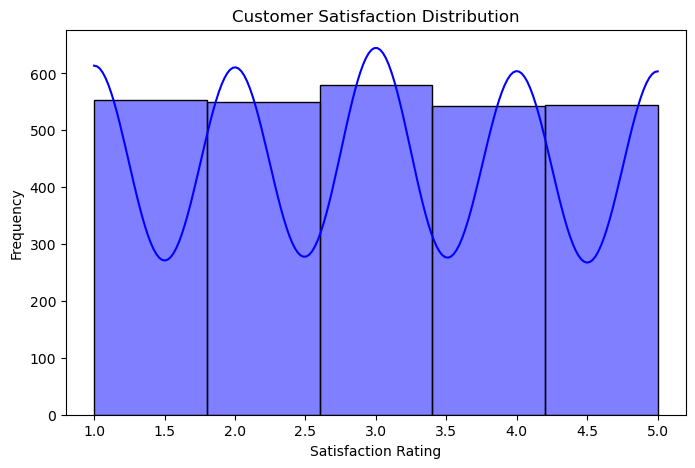

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(data['Customer Satisfaction Rating'], bins=5, kde=True, color='blue')
plt.title('Customer Satisfaction Distribution')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Frequency')
plt.show()


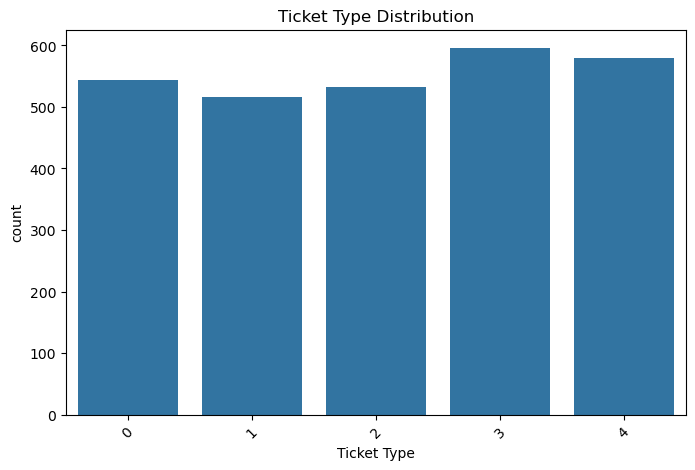

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(x=data['Ticket Type'])
plt.title("Ticket Type Distribution")
plt.xticks(rotation=45)
plt.show()


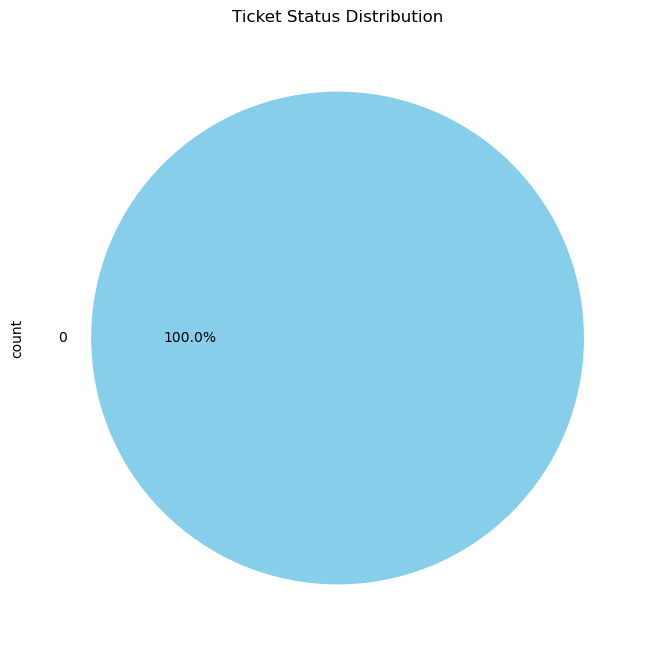

In [13]:
plt.figure(figsize=(8,8))
data['Ticket Status'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'salmon'])
plt.title('Ticket Status Distribution')
plt.show()


In [19]:
print(X_train.dtypes)


Customer Age            int64
Customer Gender         int32
Product Purchased      object
Date of Purchase       object
Ticket Type             int32
Ticket Subject         object
Ticket Description     object
Ticket Status           int32
Resolution             object
Ticket Priority         int32
Ticket Channel          int32
First Response Time    object
Time to Resolution     object
dtype: object


In [21]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

print("Converted categorical features to numeric!")


Converted categorical features to numeric!


In [27]:
print(X_train.isnull().sum())


Customer Age           0
Customer Gender        0
Product Purchased      0
Date of Purchase       0
Ticket Type            0
Ticket Subject         0
Ticket Description     0
Ticket Status          0
Resolution             0
Ticket Priority        0
Ticket Channel         0
First Response Time    0
Time to Resolution     0
dtype: int64


In [39]:
print(X_train.dtypes)


Customer Age            int64
Customer Gender         int32
Product Purchased      object
Date of Purchase       object
Ticket Type             int32
Ticket Subject         object
Ticket Description     object
Ticket Status           int32
Resolution             object
Ticket Priority         int32
Ticket Channel          int32
First Response Time    object
Time to Resolution     object
dtype: object


In [43]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply Label Encoding before splitting
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

print("Categorical features converted to numeric!")


Categorical features converted to numeric!


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
print(type(X_train))
print(type(X_test))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [49]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)


In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Feature scaling successful!")


Feature scaling successful!


In [55]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [57]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)


Accuracy: 0.2075812274368231
Classification Report:
               precision    recall  f1-score   support

         1.0       0.21      0.20      0.21       109
         2.0       0.18      0.15      0.17       117
         3.0       0.24      0.30      0.27       112
         4.0       0.20      0.19      0.20       108
         5.0       0.19      0.19      0.19       108

    accuracy                           0.21       554
   macro avg       0.20      0.21      0.21       554
weighted avg       0.20      0.21      0.21       554



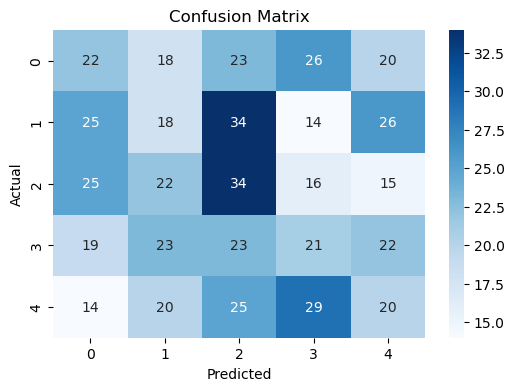

In [59]:
# Accuracy Score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


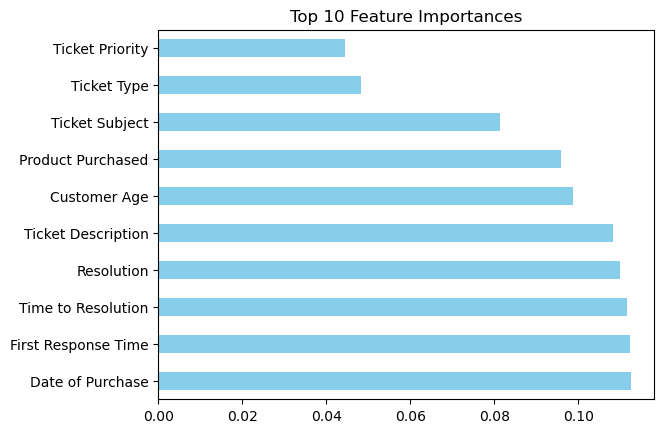

In [61]:
# Plot feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Feature Importances')
plt.show()


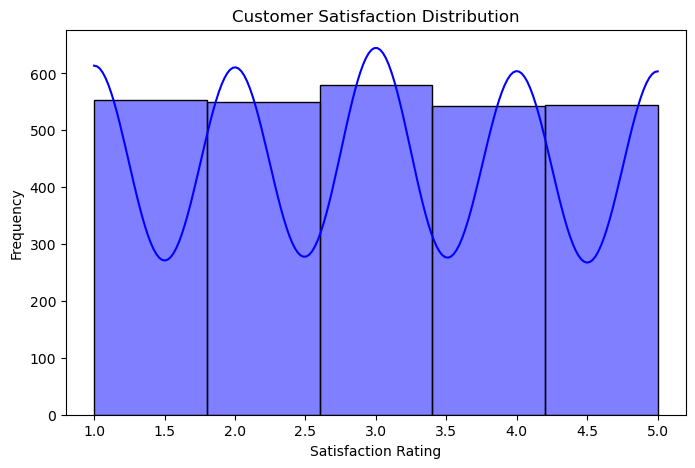

In [65]:
plt.figure(figsize=(8,5))
sns.histplot(data['Customer Satisfaction Rating'], bins=5, kde=True, color='blue')
plt.title('Customer Satisfaction Distribution')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Frequency')
plt.show()
